#### Setup

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore")

data = pd.read_csv('../data/winequality-red.csv', delimiter=';')

# Split the data into features (X) and target (y)
X = data.drop(columns=['quality'])
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 1) [3.5v] Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as default. Plot the distribution of the residues (in absolute value) using a histogram.

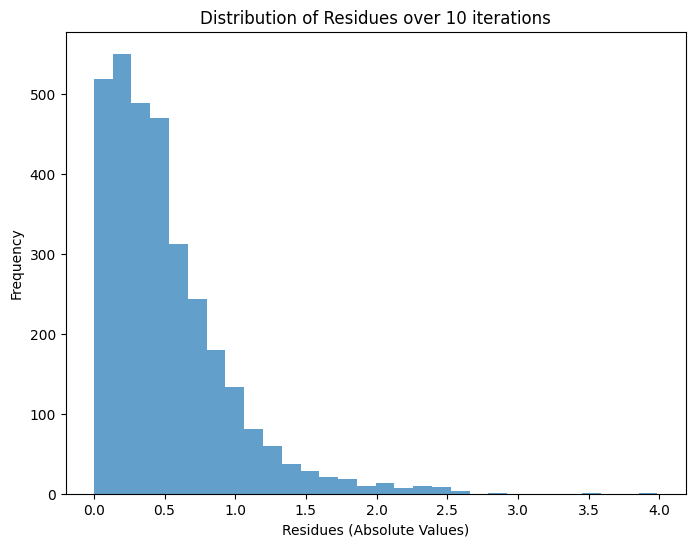

In [6]:
# Initialize lists to store residuals from each run
residuals = []
for run in range(1, 11):

    # Create and train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', validation_fraction=0.2, random_state=run, early_stopping=True)
    mlp.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp.predict(X_test)

    # Calculate the absolute residuals
    residuals.append(np.abs(y_test - y_pred))


# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(np.concatenate(residuals), bins=30, alpha=0.7)
plt.title('Distribution of Residues over 10 iterations')
plt.xlabel('Residues (Absolute Values)')
plt.ylabel('Frequency')
plt.show()


#### 2) [1.5v] Since we are in the presence of a integer regression task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.

In [7]:
original_mae = []
rounded_bounded_mae = []

for run in range(1, 11):

    # Create and train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", validation_fraction=0.2, random_state=run, early_stopping=True)
    mlp.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp.predict(X_test)

    # Round and bound the predictions
    y_pred_rounded_bounded = np.clip(np.round(y_pred), 1, 10)

    mae_original = mean_absolute_error(y_test, y_pred)
    mae_rounded_bounded = mean_absolute_error(y_test, y_pred_rounded_bounded)

    original_mae.append(mae_original)
    rounded_bounded_mae.append(mae_rounded_bounded)

# Calculate the average MAE for both original and rounded/bounded predictions
average_original_mae = np.mean(original_mae)
average_rounded_bounded_mae = np.mean(rounded_bounded_mae)

print("Average Original MAE:", average_original_mae)
print("Average Rounded/Bounded MAE:", average_rounded_bounded_mae)

Average Original MAE: 0.5097171955009516
Average Rounded/Bounded MAE: 0.43875000000000003


We get better results on Rounded/Bounded values as we expected. This deference can be explained by the fact that we avoid the extreme values with bounding, and since the wine score is a number we get better predictions when we discritize them (rounding)

#### 3) [1.5v] Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

Average RMSE for 20 iterations (early stopping): 1.40
Average RMSE for 50 iterations (early stopping): 0.80
Average RMSE for 100 iterations (early stopping): 0.69
Average RMSE for 200 iterations (early stopping): 0.66


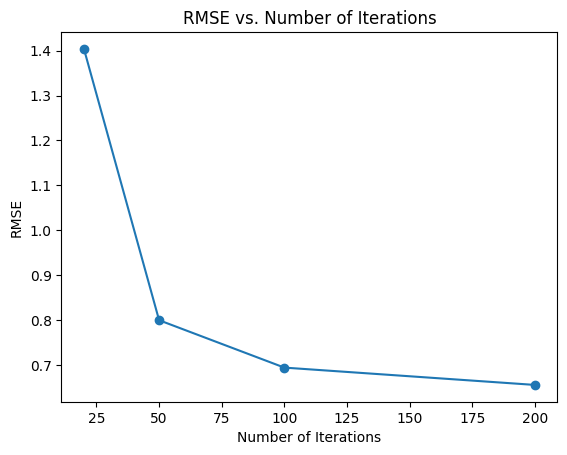

In [8]:
rmse_values = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
iteration_values = [20, 50, 100, 200]

for iteration in iteration_values:
    rmse_scores = []

    for run in range(1, 11):
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=iteration, random_state=run)

        mlp.fit(X_train, y_train)

        prediction = mlp.predict(X_test)

        rmse = sqrt(mean_squared_error(y_test, prediction))
        rmse_scores.append(rmse)

    average_rmse = np.mean(rmse_scores)
    rmse_values.append(average_rmse)

for i, num_iterations in enumerate(iteration_values):
    print(f"Average RMSE for {num_iterations} iterations (early stopping): {rmse_values[i]:.2f}")

plt.plot(iteration_values, rmse_values, marker='o')
plt.title('RMSE vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.show()

#### 4) [1.5v] Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.

Early stopping uses a small validation set to evaluate the model's accuracy. The moment the model's performance starts to deteriorate, early stopping terminates training. This way, the model generalizes better by not memorizing the entire dataset, helping reducing overfitting.

In question 3, we arrived at the same conclusion. When replacing early stopping with a fixed number of iterations, it's evident that the model's performance improves with the increase in the number of iterations. With too few iterations, the model tends to be underfitted, while with more iterations, it becomes more precise (until it starts overfitting).

We also calculated the average Root Mean Square Error (RMSE) for early stopping and compared it to the model with a fixed number of iterations. Interestingly, the early stopping approach resulted in a slightly larger average RMSE (0.67 vs. 0.66) when compared to the model with 200 iterations. This suggests that while early stopping generally enhances performance, there might be cases where the model achieves greater efficiency with a larger, fixed number of iterations.